In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def squash(x):
    # Any Any Any ..... Any ..... C
    x_norm = x.pow(2).sum(-1).sqrt().unsqueeze(-1)
    renorm_value = x_norm**2 / (1 + x_norm**2)
    return renorm_value * x / x_norm

![](1.png)

In [37]:
# 5 -> 3
c_in = torch.randn(5, 2)
c_out = torch.randn(3, 2)
W = torch.randn(5, 3, 2, 2)
b = torch.zeros(5, 3)

NUM_ITERATIONS = 10

In [ ]:
def dummy_func():
    c_out_prediction = torch.zeros(5, 3, 2)
    for i in range(5):
        for j in range(3):
            W_ij = W[i, j]
            c_out_prediction[i, j] =  W_ij @ c_in[i]


    for _ in range(NUM_ITERATIONS):
        importance = F.softmax(b, dim=-1)
        plt.imshow(importance.numpy().round(1), vmin=0, vmax=1)
        plt.show()
        c_out = (importance[:, :, None] * c_out_prediction).sum(0)
        c_out = squash(c_out)

        for i in range(5):
            for j in range(3):
                similarity = (c_out_prediction[i, j] * c_out[j]).sum()
                b[i, j] = b[i, j] + similarity
    return c_out, b
                
                
                
def my_func(....):
    return c_out, b

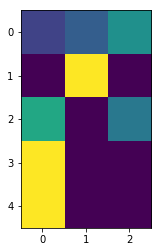

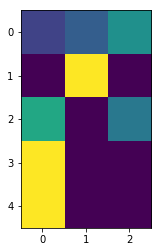

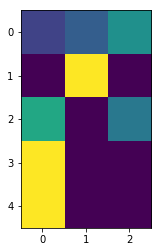

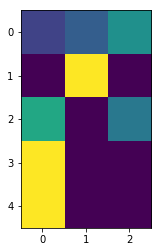

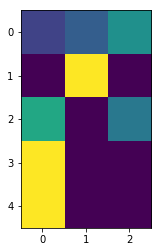

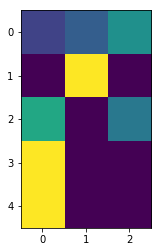

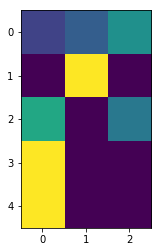

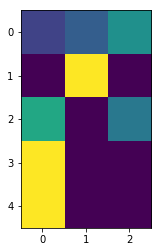

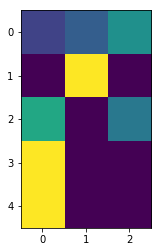

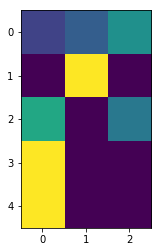

In [41]:
c_out_prediction = torch.zeros(5, 3, 2)
for i in range(5):
    for j in range(3):
        W_ij = W[i, j]
        c_out_prediction[i, j] =  W_ij @ c_in[i]


for _ in range(NUM_ITERATIONS):
    importance = F.softmax(b, dim=-1)
    plt.imshow(importance.numpy().round(1), vmin=0, vmax=1)
    plt.show()
    c_out = (importance[:, :, None] * c_out_prediction).sum(0)
    c_out = squash(c_out)
    
    for i in range(5):
        for j in range(3):
            similarity = (c_out_prediction[i, j] * c_out[j]).sum()
            b[i, j] = b[i, j] + similarity